# EDA Notebook
In this notebook, I'm going to do some exploratory data analysis on the data. I'll check if there are NaN values, distributions of different features, and data types present in the data.

In [106]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [107]:
# Load training data into dataframe
X_train = pd.read_csv('./Data/Training_Features.csv')

y_train = pd.read_csv('./Data/Training_Labels.csv')

## Training Labels
First, I'm going to take a quick look at our prediction target. I want to see how it's formatted, and the distribution of the pump statuses.

In [108]:
# Checking Data type of labels, and Non-Null counts
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [109]:
# The status_group is an Object type, let's look deeper.
y_train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [110]:
# Distrubution 
y_train['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

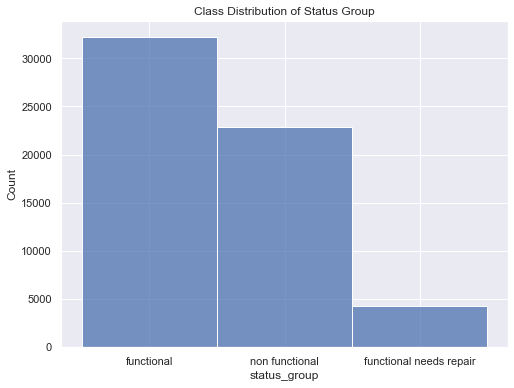

In [111]:
# Create figure and axis
status_group_fig, status_group_ax = plt.subplots(figsize=(8, 6))

# Create plot and add annotations
status_group_dist = sns.histplot(y_train['status_group'], ax=status_group_ax)
status_group_dist.set(title='Class Distribution of Status Group');

So there are 3 "classes" that these pumps could be assigned to, and theres a large imbalance between the classes. Later, these classes will have to be ordinally encoded.

## Training Features
Now, I'm going to investigate the training features in the same way, I'll be looking for anything out of place, that may need to be addressed before modeling. I will also investigate some distributions, and the relationships between features.

In [112]:
# Let's start with an overview of the training data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

It looks like the data here is mostly object/string data. This data will need to be appropriatley encoded before modeling. Next, lets look at the correlations between features in the data.

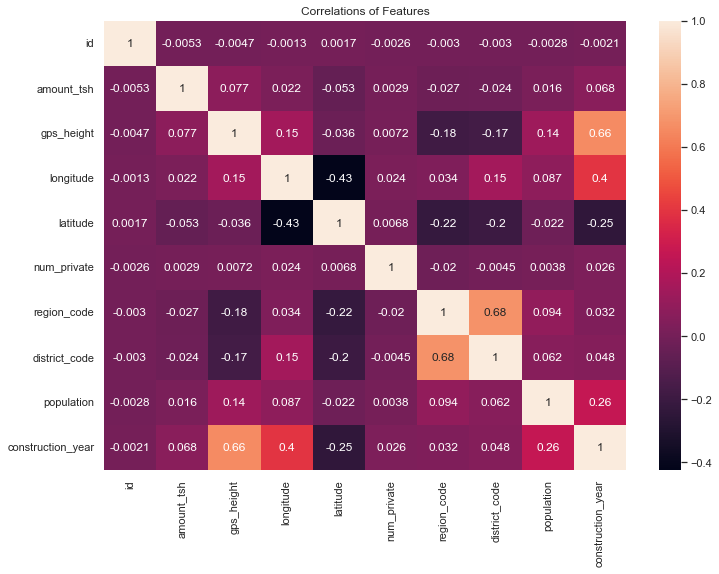

In [121]:
# Create heatmap
feature_heat = sns.heatmap(X_train.corr(), annot=True)
feature_heat.set(title='Correlations of Features');

The most intresting thing to me about this is that construction year correlates to "gps_height" and longituide. This perhaps suggests that these pumps were built starting from a certain area, and then built more as they went East? It will be intresting to see if this affects the modeling.

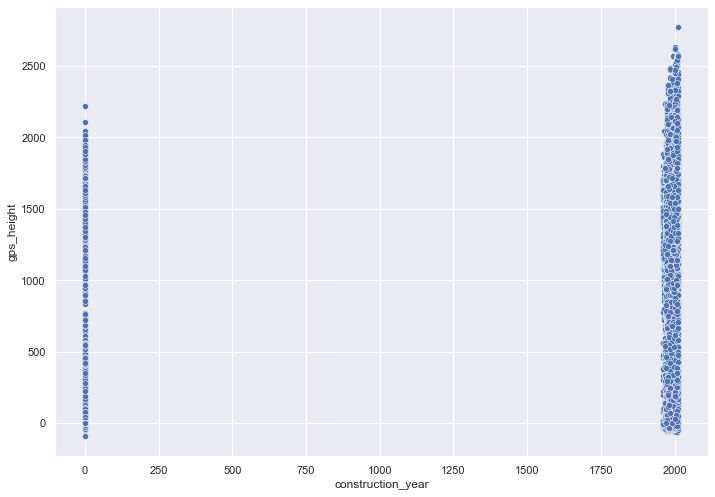

In [114]:
# Creating a scatter plot of construction year and gps height
sns.scatterplot(x=X_train['construction_year'], y=X_train['gps_height']);

## Checking for Placeholder Values
The graph above shows that there are a significant amount of pumps whose listed construction year is "0". This is definetly a placeholder value, and something that I should check for in the other features as well.

In [115]:
# Confirming placeholder values in "construction_year"
X_train['construction_year'].value_counts().head()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64

As expected, it looks like there are 20,709 entries where the "construction_year" is 0.

In [116]:
# Checking unique values of features
for items in X_train:
    print(f'{items}:', len(X_train[items].unique().tolist()))

id: 59400
amount_tsh: 98
date_recorded: 356
funder: 1898
gps_height: 2428
installer: 2146
longitude: 57516
latitude: 57517
wpt_name: 37400
num_private: 65
basin: 9
subvillage: 19288
region: 21
region_code: 27
district_code: 20
lga: 125
ward: 2092
population: 1049
public_meeting: 3
recorded_by: 1
scheme_management: 13
scheme_name: 2697
permit: 3
construction_year: 55
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6


In [117]:
# There's only one value in the 'recorded by' column, it could probably be saftley dropped from the data.
X_train['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [118]:
# Checking some of the important features like "amount_tsh" (amount of water available in the well)
X_train['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

The 0.0 here is probably an indicator that the well is broken, rather then a placeholder value.

In [119]:
# Checking water quality feature
X_train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

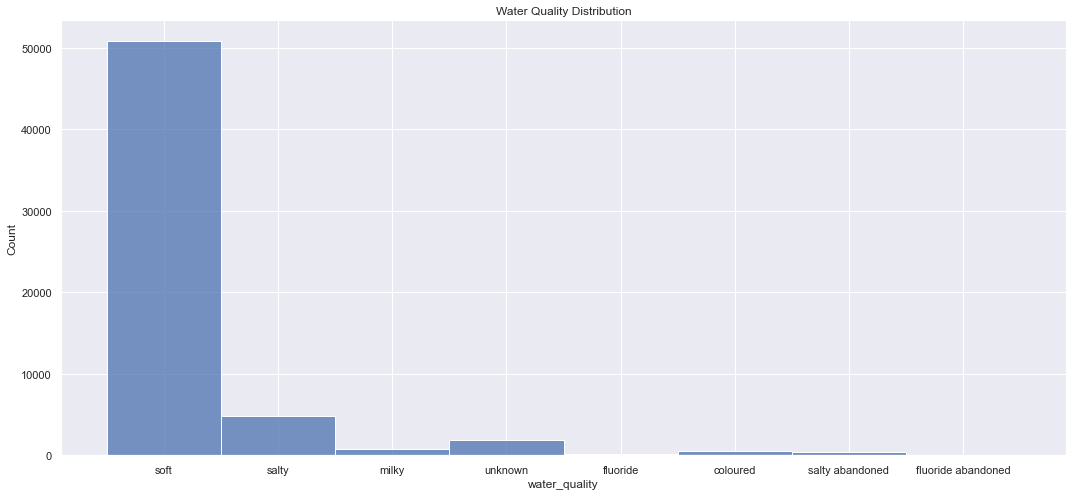

In [129]:
# The "Unknown" category is essentially a NaN value, but it won't need to be modified.
fig, ax = plt.subplots(figsize = (18, 8))
water_qual_hist = sns.histplot(X_train['water_quality'], ax=ax)
water_qual_hist.set(title='Water Quality Distribution');

In [132]:
# Checking the "Source" of the well
X_train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

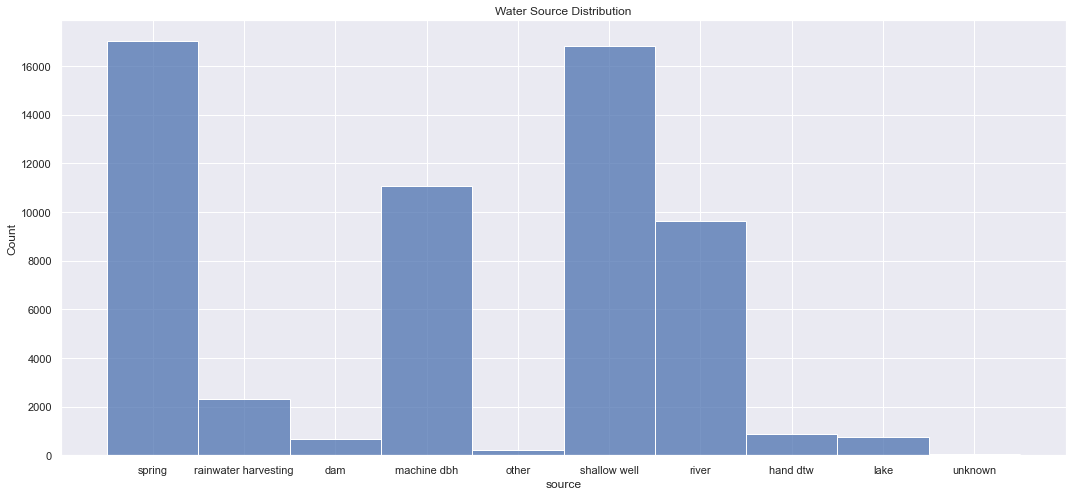

In [134]:
# Creating figure and axis objects
source_fig, source_ax = plt.subplots(figsize = (18, 8))

# Plotting histogram
water_source_hist = sns.histplot(X_train['source'], ax=source_ax)
water_source_hist.set(title='Water Source Distribution');